In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_data = pd.read_csv('./training.csv')
val_data = pd.read_csv('./validation.csv')
test_data = pd.read_csv('./test.csv')

# Basic preprocessing
def preprocess_text(df):
    df['cleaned_text'] = df['text'].str.lower().str.replace(r'[^\w\s]', '')
    return df

train_data = preprocess_text(train_data)
val_data = preprocess_text(val_data)
test_data = preprocess_text(test_data)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_val = label_encoder.transform(val_data['label'])
y_test = label_encoder.transform(test_data['label'])

X_train = train_data['cleaned_text']
X_val = val_data['cleaned_text']
X_test = test_data['cleaned_text']

# Traditional methods

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
lr_val_pred = lr.predict(X_val_tfidf)
print("Logistic Regression:\n", classification_report(y_val, lr_val_pred))

# SVM
svm = SVC()
svm.fit(X_train_tfidf, y_train)
svm_val_pred = svm.predict(X_val_tfidf)
print("SVM:\n", classification_report(y_val, svm_val_pred))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_val_pred = nb.predict(X_val_tfidf)
print("Naive Bayes:\n", classification_report(y_val, nb_val_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_val_pred = rf.predict(X_val_tfidf)
print("Random Forest:\n", classification_report(y_val, rf_val_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       550
           1       0.85      0.95      0.90       704
           2       0.89      0.63      0.74       178
           3       0.91      0.82      0.86       275
           4       0.85      0.75      0.80       212
           5       0.84      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.87      0.86      0.86      2000

SVM:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       550
           1       0.84      0.96      0.90       704
           2       0.93      0.61      0.74       178
           3       0.92      0.79      0.85       275
           4       0.85      0.79      0.82       212
           5       0.93      0.64      0.76        81

    accuracy                           0.87      

# Deep learning

## tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
epochs_num = 2
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=maxlen),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_pad, y_train, epochs=epochs_num, batch_size=64, validation_data=(X_val_pad, y_val))

# Evaluate the model
lstm_val_pred = lstm_model.predict(X_val_pad)
lstm_val_pred_classes = np.argmax(lstm_val_pred, axis=1)
print("LSTM:\n", classification_report(y_val, lstm_val_pred_classes))

# Define the GRU model
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=maxlen),
    GRU(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train_pad, y_train, epochs=epochs_num, batch_size=64, validation_data=(X_val_pad, y_val)) # change epochs

# Evaluate the model
gru_val_pred = gru_model.predict(X_val_pad)
gru_val_pred_classes = np.argmax(gru_val_pred, axis=1)
print("GRU:\n", classification_report(y_val, gru_val_pred_classes))

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_pad, y_train, epochs=epochs_num, batch_size=64, validation_data=(X_val_pad, y_val))

# Evaluate the model
cnn_val_pred = cnn_model.predict(X_val_pad)
cnn_val_pred_classes = np.argmax(cnn_val_pred, axis=1)
print("CNN:\n", classification_report(y_val, cnn_val_pred_classes))


Epoch 1/2
250/250 [==============================] - 71s 276ms/step - loss: 1.2784 - accuracy: 0.5126 - val_loss: 0.6746 - val_accuracy: 0.7855
Epoch 2/2
63/63 [==============================] - 1s 15ms/step
LSTM:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       550
           1       0.90      0.96      0.93       704
           2       0.88      0.74      0.80       178
           3       0.85      0.95      0.90       275
           4       0.91      0.81      0.85       212
           5       0.81      0.68      0.74        81

    accuracy                           0.90      2000
   macro avg       0.88      0.84      0.86      2000
weighted avg       0.90      0.90      0.90      2000

Epoch 1/2
250/250 [==============================] - 48s 184ms/step - loss: 1.2309 - accuracy: 0.5204 - val_loss: 0.5025 - val_accuracy: 0.8655
Epoch 2/2
63/63 [==============================] - 1s 11ms/step
GRU:
               precision    r

In [6]:
import tensorflow as tf


# List physical devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Available physical devices:", physical_devices)

# Check if TensorFlow is using the GPU
print("Is TensorFlow using GPU?", tf.test.is_gpu_available())


Available physical devices: []
Is TensorFlow using GPU? False


## transformers

In [14]:
import tensorflow as tf
import transformers

from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Ensure these versions are compatible:
# TensorFlow 2.12.0 and transformers 4.28.1 or later
# print(tf.__version__)
# print(transformers.__version__)
num_labels = len(train_data['label'].unique())
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Tokenization function
def tokenize_data(data, max_length=128):
    return tokenizer(
        data['text'].tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

# Tokenize datasets
X_train = tokenize_data(train_data)
X_val = tokenize_data(val_data)
X_test = tokenize_data(test_data)
batch_size = 16

# Prepare TensorFlow dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': X_train['input_ids'], 
        'attention_mask': X_train['attention_mask'], 
        'token_type_ids': X_train['token_type_ids']
    },
    y_train
)).batch(batch_size).shuffle(1000)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': X_val['input_ids'], 
        'attention_mask': X_val['attention_mask'], 
        'token_type_ids': X_val['token_type_ids']
    },
    y_val
)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': X_test['input_ids'], 
        'attention_mask': X_test['attention_mask'], 
        'token_type_ids': X_test['token_type_ids']
    },
    y_test
)).batch(batch_size)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=2e-5),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy('accuracy')]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=1
)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  13/1000 [..............................] - ETA: 1:59:04 - loss: 1.7352 - accuracy: 0.2452

KeyboardInterrupt: 

# Evaluation and comparison

In [12]:
# Assuming we have collected the classification reports
results = {
    'Logistic Regression': lr_val_pred,
    'SVM': svm_val_pred,
    'Naive Bayes': nb_val_pred,
    'Random Forest': rf_val_pred,
    'LSTM': lstm_val_pred_classes,
    # 'BERT': val_pred_classes
    # Add GRU, CNN, and BERT results
}

# Compare accuracy, precision, recall, and F1-score
for model, preds in results.items():
    print(f"{model}:\n", classification_report(y_val, preds))
    
metrics = {}

for model, preds in results.items():
    report = classification_report(y_val, preds, output_dict=True)
    metrics[model] = {
        'accuracy': report['accuracy'],
        'macro avg': {
            'precision': report['macro avg']['precision'],
            'recall': report['macro avg']['recall'],
            'f1-score': report['macro avg']['f1-score']
        },
        'weighted avg': {
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall'],
            'f1-score': report['weighted avg']['f1-score']
        }
    }

# Print collected metrics
for model, stats in metrics.items():
    print(f"{model}:")
    print(f"  Accuracy: {stats['accuracy']:.4f}")
    print(f"  Macro Average Precision: {stats['macro avg']['precision']:.4f}")
    print(f"  Macro Average Recall: {stats['macro avg']['recall']:.4f}")
    print(f"  Macro Average F1-score: {stats['macro avg']['f1-score']:.4f}")
    print(f"  Weighted Average Precision: {stats['weighted avg']['precision']:.4f}")
    print(f"  Weighted Average Recall: {stats['weighted avg']['recall']:.4f}")
    print(f"  Weighted Average F1-score: {stats['weighted avg']['f1-score']:.4f}")


Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       550
           1       0.85      0.95      0.90       704
           2       0.89      0.63      0.74       178
           3       0.91      0.82      0.86       275
           4       0.85      0.75      0.80       212
           5       0.84      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.87      0.86      0.86      2000

SVM:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       550
           1       0.84      0.96      0.90       704
           2       0.93      0.61      0.74       178
           3       0.92      0.79      0.85       275
           4       0.85      0.79      0.82       212
           5       0.93      0.64      0.76        81

    accuracy                           0.87      

# Evaluation on test set

In [11]:
# Evaluate the best model on the test set
best_model = lstm_model  # Assuming LSTM is the best model
test_pred = best_model.predict(X_test_pad)
test_pred_classes = np.argmax(test_pred, axis=1)
print("Final Model Evaluation on Test Set:\n", classification_report(y_test, test_pred_classes))


63/63 [==============================] - 4s 39ms/step
Final Model Evaluation on Test Set:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       581
           1       0.89      0.94      0.91       695
           2       0.79      0.69      0.74       159
           3       0.84      0.95      0.89       275
           4       0.93      0.83      0.88       224
           5       0.68      0.58      0.62        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



# Visualization

Logistic Regression - Accuracy: 0.263, Precision: 0.16587351707486517, Recall: 0.16671872512824557, F1-score: 0.16567221614912472
SVM - Accuracy: 0.2675, Precision: 0.16986861077273993, Recall: 0.17065820341574542, F1-score: 0.16944378223230772
Naive Bayes - Accuracy: 0.319, Precision: 0.15864071419792727, Recall: 0.17539511404489302, F1-score: 0.15624362310015064
Random Forest - Accuracy: 0.2535, Precision: 0.16750212025756198, Recall: 0.16739763744576297, F1-score: 0.1671179086982575


c:\Users\JA\source\emotion-analysis\newenv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


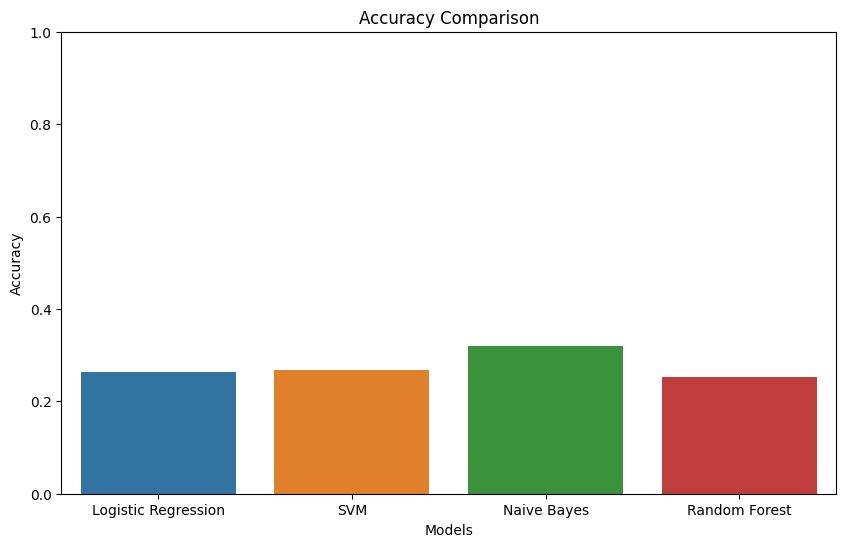

c:\Users\JA\source\emotion-analysis\newenv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


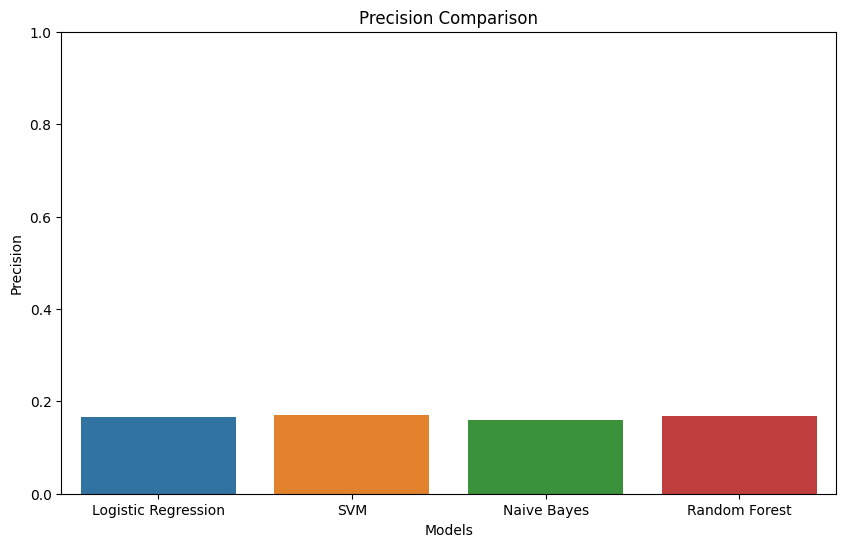

c:\Users\JA\source\emotion-analysis\newenv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


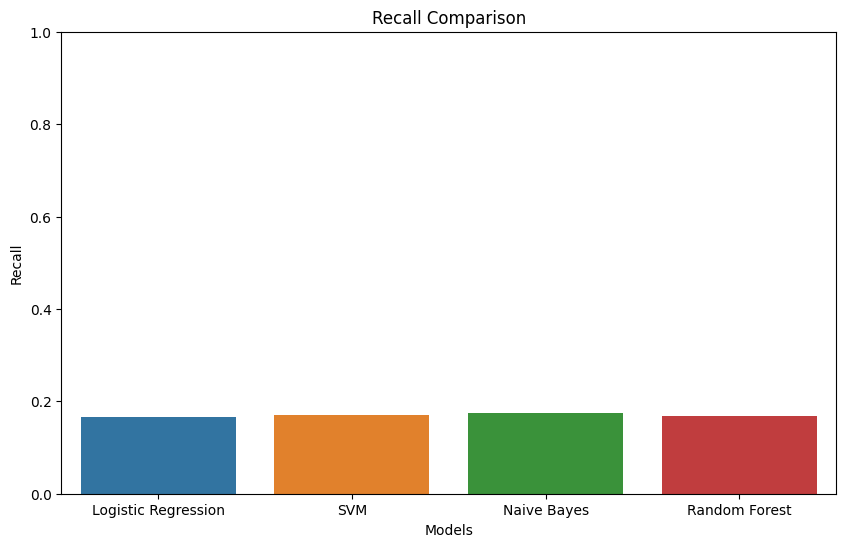

c:\Users\JA\source\emotion-analysis\newenv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


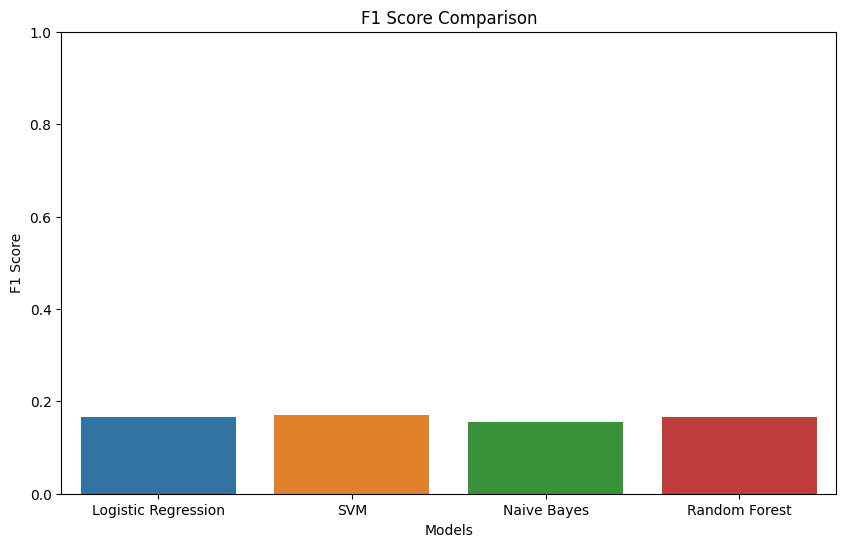

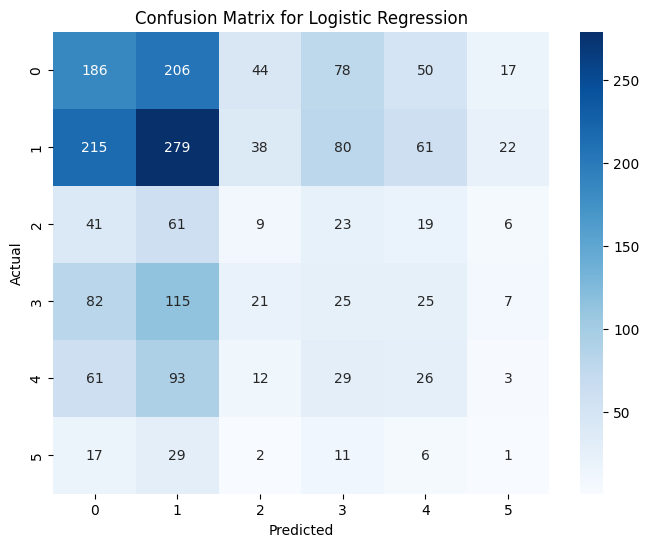

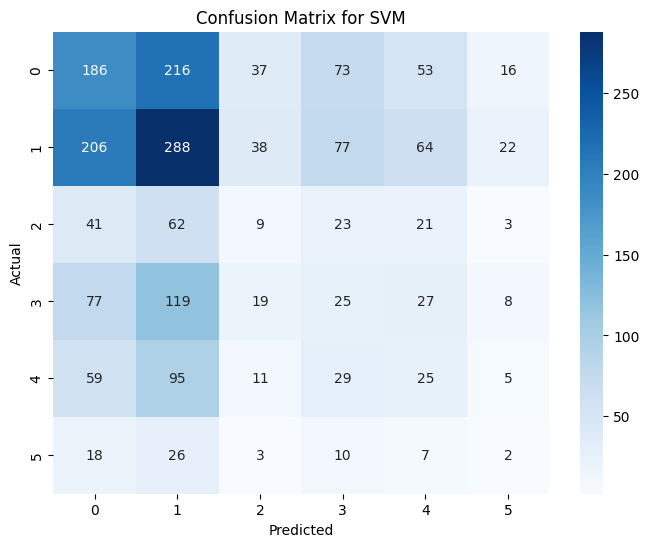

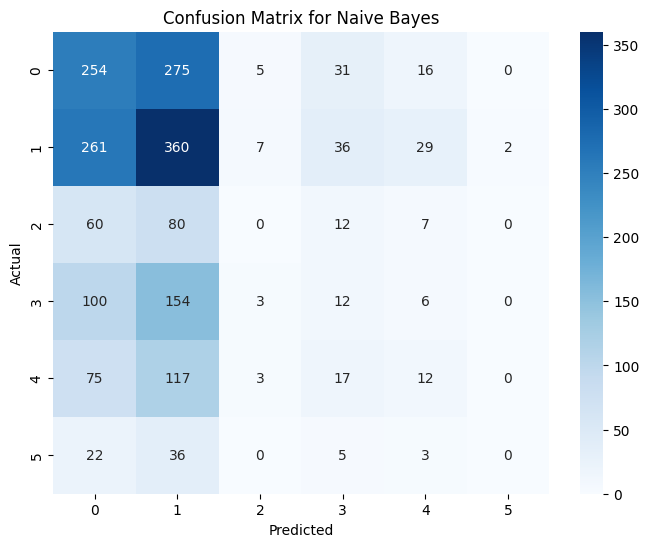

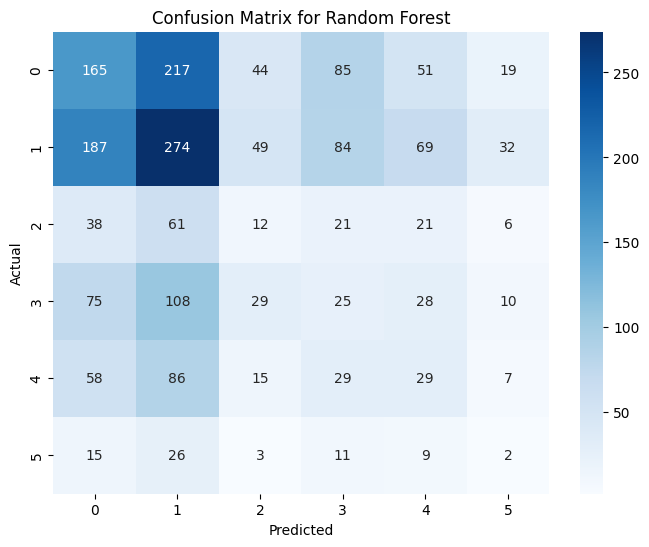

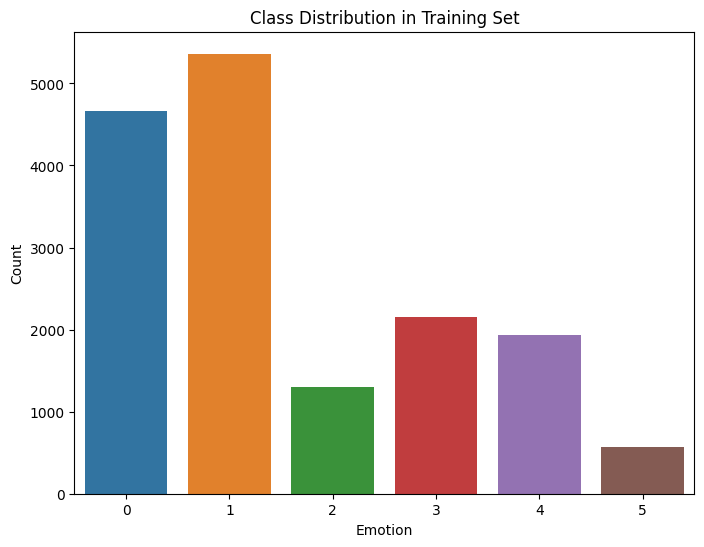

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of models and their predicted labels
models_predictions = {
    'Logistic Regression': lr_val_pred,
    'SVM': svm_val_pred,
    'Naive Bayes': nb_val_pred,
    'Random Forest': rf_val_pred
}

# Function to extract metrics
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = np.mean([report[label]['precision'] for label in report if label.isdigit()])
    recall = np.mean([report[label]['recall'] for label in report if label.isdigit()])
    f1_score = np.mean([report[label]['f1-score'] for label in report if label.isdigit()])
    return accuracy, precision, recall, f1_score

# Initialize lists for metrics
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Calculate metrics for each model
for model_name, y_pred in models_predictions.items():
    accuracy, precision, recall, f1_score = extract_metrics(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1_score}")
    
# Plotting the metrics
def plot_metric(models, metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=metric_values)
    plt.title(f'{metric_name} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
    plt.show()

models = list(models_predictions.keys())

plot_metric(models, accuracies, 'Accuracy')
plot_metric(models, precisions, 'Precision')
plot_metric(models, recalls, 'Recall')
plot_metric(models, f1_scores, 'F1 Score')

# Plot confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model_name, y_pred in models_predictions.items():
    plot_confusion_matrix(y_test, y_pred, model_name)
    
# Assuming 'y_train' and 'y_test' are encoded labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

